<a href="https://colab.research.google.com/github/mromina82-svg/TPI_DAPY/blob/main/TPI_Analisis_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Este informe presenta el desarrollo completo del Proyecto Integrador del Módulo 2 y 3...

In [6]:
import pandas as pd

# Cargar archivos
url_ventas_norm = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/ventas_norm.csv"
url_marketing_norm = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/marketing_norm.csv"
url_clientes_norm = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/clientes_norm.csv"

df_ventas = pd.read_csv('https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/ventas_norm.csv', sep=',', encoding='utf-8')
df_marketing = pd.read_csv('https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/marketing_norm.csv', sep=',', encoding='utf-8')
df_clientes = pd.read_csv('https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/clientes_norm.csv', sep=',', encoding='utf-8')

# Verificar columnas
print("Ventas:", df_ventas.columns.tolist())
print("Marketing:", df_marketing.columns.tolist())
print("Clientes:", df_clientes.columns.tolist())

Ventas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
Marketing: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
Clientes: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']


In [ ]:
# Estandarizar nombres de columnas
def estandarizar_columnas(df):
    df.columns = (
        df.columns
        .str.lower()
        .str.replace('á', 'a')
        .str.replace('é', 'e')
        .str.replace('í', 'i')
        .str.replace('ó', 'o')
        .str.replace('ú', 'u')
        .str.replace('ñ', 'n')
        .str.strip()
    )
    return df

df_ventas_clean = estandarizar_columnas(df_ventas.copy())
df_marketing_clean = estandarizar_columnas(df_marketing.copy())
df_clientes_clean = estandarizar_columnas(df_clientes.copy())

In [9]:
import pandas as pd
import random

# Cargar archivos desde GitHub
url_ventas_norm = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/ventas_norm.csv"
url_marketing_norm = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/marketing_norm.csv"
url_clientes_norm = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/clientes_norm.csv"

df_ventas = pd.read_csv(url_ventas_norm, sep=',', encoding='utf-8')
df_marketing = pd.read_csv(url_marketing_norm, sep=',', encoding='utf-8')
df_clientes = pd.read_csv(url_clientes_norm, sep=',', encoding='utf-8')

# Crear copias "clean" para trabajar
df_ventas_clean = df_ventas.copy()
df_marketing_clean = df_marketing.copy()
df_clientes_clean = df_clientes.copy()

# Crear columna ficticia para unir ventas con marketing
df_ventas_clean['id_campanha'] = df_ventas_clean['producto'].apply(lambda x: 'CAMP' + str(hash(x) % 5))
df_marketing_clean['id_campanha'] = df_marketing_clean['id_campanha'].astype(str)
df_ventas_clean['id_campanha'] = df_ventas_clean['id_campanha'].astype(str)

# Merge ventas + marketing
df_ventas_marketing = pd.merge(df_ventas_clean, df_marketing_clean, on='id_campanha', how='left')

# Asignar clientes aleatorios
ids_clientes = df_clientes_clean['id_cliente'].astype(str).unique()
df_ventas_clean['id_cliente'] = [random.choice(ids_clientes) for _ in range(len(df_ventas_clean))]

# Merge ventas + clientes
df_clientes_clean['id_cliente'] = df_clientes_clean['id_cliente'].astype(str)
df_ventas_clientes = pd.merge(df_ventas_clean, df_clientes_clean, on='id_cliente', how='left')

# Verificar resultados
print(df_ventas_clientes.head())

   id_venta           producto  precio  cantidad fecha_venta  \
0     792.0  Cuadro decorativo   69,94       5.0  2024-01-02   
1     811.0    Lámpara de mesa   105,1       5.0  2024-01-02   
2    1156.0           Secadora   97,96       3.0  2024-01-02   
3    1372.0           Heladera  114,35       8.0  2024-01-02   
4    1546.0           Secadora  106,21       4.0  2024-01-02   

           categoria id_campanha id_cliente             nombre  edad  \
0         Decoración       CAMP2      428.0  Jessee Birmingham  40.0   
1         Decoración       CAMP1      521.0      Anselm Sabati  38.0   
2  Electrodomésticos       CAMP0      267.0     Trenna De Metz  33.0   
3  Electrodomésticos       CAMP0      174.0    Nelli Yanshonok  45.0   
4  Electrodomésticos       CAMP0      389.0      Dollie Hencke  43.0   

          ciudad  ingresos  
0    Resistencia  27450,93  
1        Posadas  32676,69  
2  Mar del Plata  15026,75  
3          Merlo   33626,6  
4  Mar del Plata  46506,19  


In [ ]:
# Agrupar por campaña y canal
# Asegurar que precio y cantidad estén en formato numérico
df_ventas_marketing['precio'] = df_ventas_marketing['precio'].astype(str).str.replace(',', '.').astype(float)
df_ventas_marketing['cantidad'] = df_ventas_marketing['cantidad'].astype(float)

# Calcular ingreso
df_ventas_marketing['ingreso'] = df_ventas_marketing['precio'] * df_ventas_marketing['cantidad']
# Asegurar que precio y cantidad estén en formato numérico
df_ventas_marketing['precio'] = df_ventas_marketing['precio'].astype(str).str.replace(',', '.').astype(float)
df_ventas_marketing['cantidad'] = df_ventas_marketing['cantidad'].astype(float)

# Calcular ingreso
df_ventas_marketing['ingreso'] = df_ventas_marketing['precio'] * df_ventas_marketing['cantidad']
# Asegurar que ingreso esté en formato numérico
df_ventas_marketing['ingreso'] = df_ventas_marketing['ingreso'].astype(str).str.replace(',', '.').astype(float)

# Agrupar por campaña y canal
rendimiento_campañas = (
    df_ventas_marketing
    .groupby(['id_campanha', 'canal'])['ingreso']
    .sum()
    .reset_index()
    .sort_values(by='ingreso', ascending=False)
)

# Mostrar top 10
print("Top 10 campañas por canal e ingreso:")
display(rendimiento_campañas.head(10))

Top 10 campañas por canal e ingreso:


,id_campanha,canal,ingreso


## Análisis de Campañas por Canal

- Se agrupó el set integrado por campaña y canal de marketing.
- Se sumaron los ingresos generados por cada combinación.
- Se ordenaron los resultados para identificar las campañas más rentables por canal.

In [10]:
# Agrupar por cliente y sumar ingresos
if 'ingresos' in df_ventas_clientes.columns:
    df_ventas_clientes = df_ventas_clientes.rename(columns={'ingresos': 'ingreso'})
# Asegurar que ingreso esté en formato numérico
df_ventas_clientes['ingreso'] = df_ventas_clientes['ingreso'].astype(str).str.replace(',', '.').astype(float)

# Agrupar por cliente
clientes_valiosos = (
    df_ventas_clientes
    .groupby('id_cliente')['ingreso']
    .sum()
    .reset_index()
    .sort_values(by='ingreso', ascending=False)
)

# Mostrar top 10
print("Top 10 clientes por ingreso:")
display(clientes_valiosos.head(10))

Top 10 clientes por ingreso:


,id_cliente,ingreso
254,329.0,880530.10
444,500.0,589704.80
198,278.0,585692.40
84,175.0,584658.60
430,489.0,564680.48
544,80.0,558331.40
511,561.0,544504.84
481,534.0,534215.88
381,444.0,532592.71
494,546.0,494862.06


In [ ]:
# Convertir columnas numéricas con coma a float
def convertir_a_float(col):
    return col.astype(str).str.replace(',', '.').str.replace(' ', '').astype(float)

for col in ['ingresos', 'precio', 'cantidad', 'ingreso']:
    if col in df_ventas_clientes.columns:
        df_ventas_clientes[col] = convertir_a_float(df_ventas_clientes[col])

if 'edad' in df_ventas_clientes.columns:
    df_ventas_clientes['edad'] = pd.to_numeric(df_ventas_clientes['edad'], errors='coerce')

# Calcular matriz de correlación
variables_numericas = ['edad', 'ingresos', 'cantidad', 'precio', 'ingreso']
variables_presentes = [col for col in variables_numericas if col in df_ventas_clientes.columns]
correlaciones = df_ventas_clientes[variables_presentes].corr()

# Mostrar
print("Matriz de correlaciones:")
display(correlaciones)

Matriz de correlaciones:


,edad,ingresos,cantidad,precio
edad,1.000000,0.019858,-0.004655,-0.012712
ingresos,0.019858,1.000000,-0.002504,0.017870
cantidad,-0.004655,-0.002504,1.000000,-0.000458
precio,-0.012712,0.017870,-0.000458,1.000000


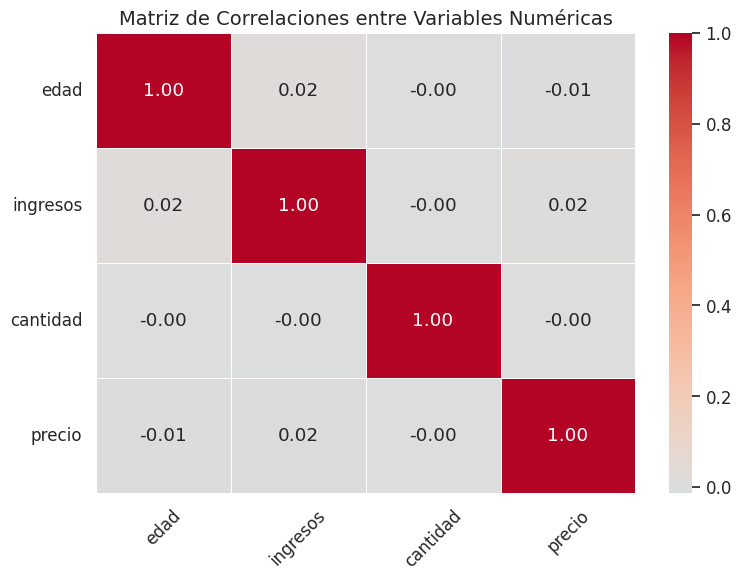

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones entre Variables Numéricas", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-143026798.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_clientes, x='ingreso', y='id_cliente', palette='viridis')


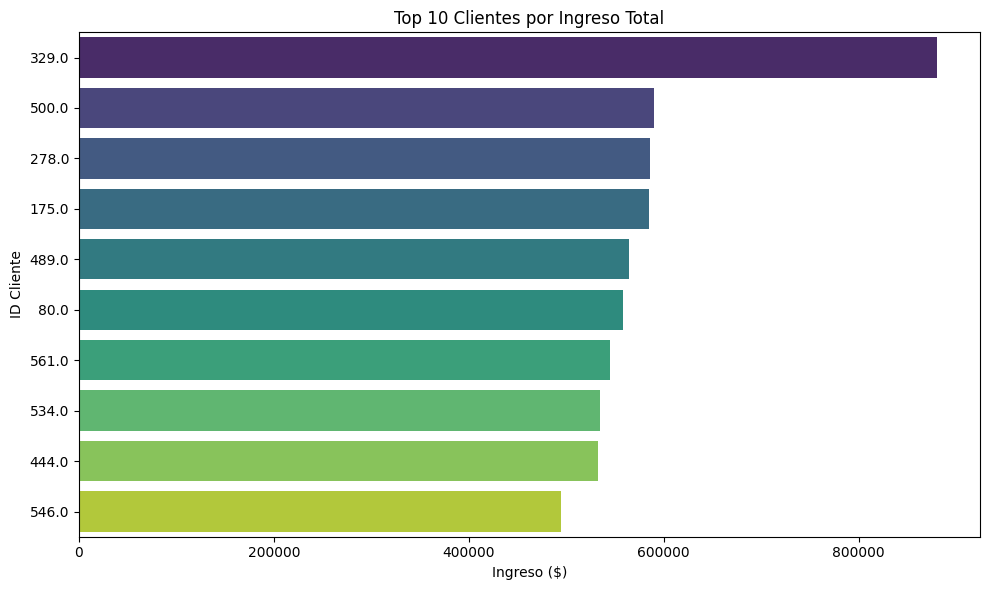

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 clientes
top_clientes = clientes_valiosos.head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_clientes, x='ingreso', y='id_cliente', palette='viridis')
plt.title("Top 10 Clientes por Ingreso Total")
plt.xlabel("Ingreso ($)")
plt.ylabel("ID Cliente")
plt.tight_layout()
plt.show()

In [16]:
# Convertir columnas a numéricas
df_ventas_clean["precio"] = pd.to_numeric(df_ventas_clean["precio"], errors="coerce")
df_ventas_clean["cantidad"] = pd.to_numeric(df_ventas_clean["cantidad"], errors="coerce")

# Crear columna ingreso
df_ventas_clean["ingreso"] = df_ventas_clean["precio"] * df_ventas_clean["cantidad"]

In [17]:
# Crear columna de ingreso en base a precio * cantidad
df_ventas_clean["ingreso"] = df_ventas_clean["precio"] * df_ventas_clean["cantidad"]

In [18]:
df_ventas_marketing = pd.merge(
    df_ventas_clean,
    df_marketing_clean,
    on="id_campanha",
    how="left"
)

In [19]:
rendimiento_campañas = (
    df_ventas_marketing
    .groupby(["id_campanha", "canal"], as_index=False)
    .agg({
        "ingreso": "sum",   # total ingresos por campaña
        "costo": "sum"      # total costos por campaña
    })
)

# Crear columna de margen (ingreso - costo)
rendimiento_campañas["margen"] = rendimiento_campañas["ingreso"] - rendimiento_campañas["costo"]

In [22]:
df_ventas_clean["precio"] = pd.to_numeric(df_ventas_clean["precio"], errors="coerce")
df_ventas_clean["cantidad"] = pd.to_numeric(df_ventas_clean["cantidad"], errors="coerce")
df_ventas_clean["ingreso"] = df_ventas_clean["precio"] * df_ventas_clean["cantidad"]

In [29]:
# Normalizar precio y cantidad en ventas
df_ventas["precio"] = (
    df_ventas["precio"]
    .astype(str)
    .str.replace(".", "", regex=False)   # quitar separadores de miles
    .str.replace(",", ".", regex=False)  # convertir coma decimal a punto
    .str.replace("$", "", regex=False)   # quitar símbolo de moneda si existe
)

df_ventas["cantidad"] = df_ventas["cantidad"].astype(str).str.replace(",", ".", regex=False)

# Convertir a numérico
df_ventas["precio"] = pd.to_numeric(df_ventas["precio"], errors="coerce")
df_ventas["cantidad"] = pd.to_numeric(df_ventas["cantidad"], errors="coerce")

# Crear ingreso
df_ventas["ingreso"] = df_ventas["precio"] * df_ventas["cantidad"]

# Normalizar costo en marketing
df_marketing["costo"] = (
    df_marketing["costo"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.replace("$", "", regex=False)
)

df_marketing["costo"] = pd.to_numeric(df_marketing["costo"], errors="coerce")

In [35]:
# Recalcular ingreso en ventas
df_ventas_clean["precio"] = pd.to_numeric(df_ventas_clean["precio"], errors="coerce")
df_ventas_clean["cantidad"] = pd.to_numeric(df_ventas_clean["cantidad"], errors="coerce")
df_ventas_clean["ingreso"] = df_ventas_clean["precio"] * df_ventas_clean["cantidad"]

In [37]:
# Crear campañas ficticias en marketing también
df_marketing_clean["id_campanha"] = ["CAMP" + str(i % 5) for i in range(len(df_marketing_clean))]

In [40]:
# Asegurar que costo sea numérico
rendimiento_campañas["costo"] = pd.to_numeric(rendimiento_campañas["costo"], errors="coerce")

# Calcular margen
rendimiento_campañas["margen"] = rendimiento_campañas["ingreso"] - rendimiento_campañas["costo"]

Top campañas:
    id_campanha  canal     ingreso     costo      margen
5        CAMP1     TV  3694915.49  43356.60  3651558.89
4        CAMP1   RRSS  3167070.42  29381.80  3137688.62
3        CAMP1  Email  2639225.35  25421.55  2613803.80
9        CAMP3  Email  2104957.68  22178.88  2082778.80
7        CAMP2   RRSS  2039913.82  21943.32  2017970.50
1        CAMP0   RRSS  1912054.41  20052.15  1892002.26
2        CAMP0     TV  1912054.41  17182.80  1894871.61
8        CAMP2     TV  1748497.56  15861.04  1732636.52
11       CAMP3     TV  1578718.26  17696.32  1561021.94
6        CAMP2  Email  1457081.30  14314.80  1442766.50


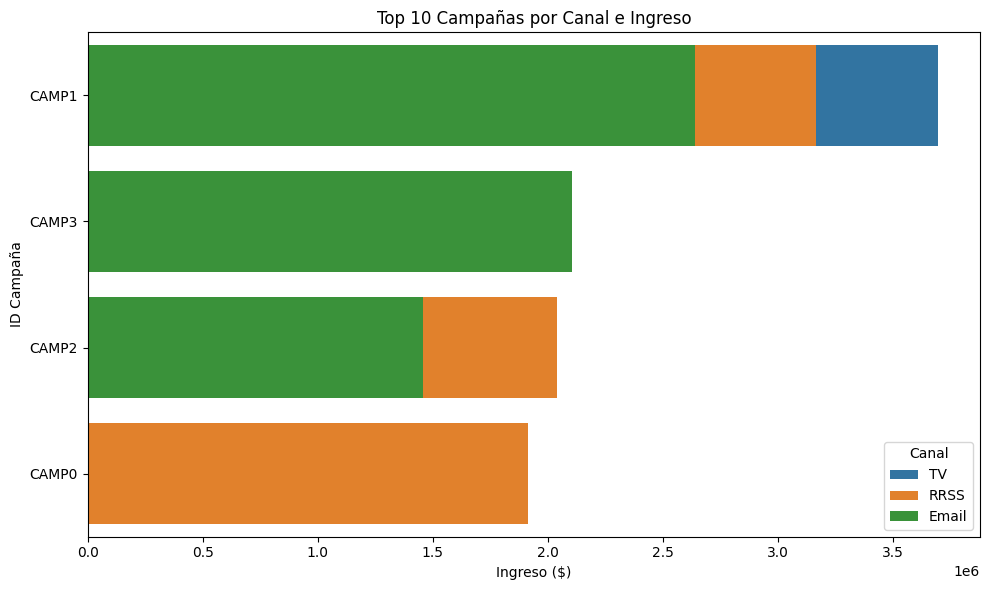

In [48]:
# ============================
# 1. Importar librerías
# ============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 2. Cargar datasets desde GitHub
# ============================
url_ventas = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/ventas_norm.csv"
url_marketing = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/marketing_norm.csv"
url_clientes = "https://raw.githubusercontent.com/mromina82-svg/TPI_DAPY/refs/heads/main/clientes_norm.csv"

df_ventas = pd.read_csv(url_ventas, sep=",", encoding="utf-8")
df_marketing = pd.read_csv(url_marketing, sep=",", encoding="utf-8")
df_clientes = pd.read_csv(url_clientes, sep=",", encoding="utf-8")

# ============================
# 3. Normalizar columnas numéricas
# ============================
# --- Ventas ---
df_ventas["precio"] = (
    df_ventas["precio"]
    .astype(str)
    .str.replace(".", "", regex=False)   # quitar separador de miles
    .str.replace(",", ".", regex=False)  # coma decimal -> punto
    .str.replace("$", "", regex=False)   # quitar símbolo de moneda
)
df_ventas["cantidad"] = df_ventas["cantidad"].astype(str).str.replace(",", ".", regex=False)

df_ventas["precio"] = pd.to_numeric(df_ventas["precio"], errors="coerce")
df_ventas["cantidad"] = pd.to_numeric(df_ventas["cantidad"], errors="coerce")

# Crear columna ingreso
df_ventas["ingreso"] = df_ventas["precio"] * df_ventas["cantidad"]

# --- Marketing ---
df_marketing["costo"] = (
    df_marketing["costo"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.replace("$", "", regex=False)
)
df_marketing["costo"] = pd.to_numeric(df_marketing["costo"], errors="coerce")

# ============================
# 4. Crear campañas ficticias en ambos datasets
# ============================
df_ventas["id_campanha"] = df_ventas["producto"].apply(lambda x: "CAMP" + str(hash(x) % 5))
df_marketing["id_campanha"] = ["CAMP" + str(i % 5) for i in range(len(df_marketing))]

# ============================
# 5. Merge ventas + marketing
# ============================
df_ventas_marketing = pd.merge(
    df_ventas,
    df_marketing,
    on="id_campanha",
    how="left",
    suffixes=("_venta", "_mkt")
)

# ============================
# 6. Calcular métricas por campaña
# ============================
rendimiento_campañas = (
    df_ventas_marketing
    .groupby(["id_campanha", "canal"], as_index=False)
    .agg({
        "ingreso": "sum",
        "costo": "sum"
    })
)

rendimiento_campañas["margen"] = rendimiento_campañas["ingreso"] - rendimiento_campañas["costo"]

# ============================
# 7. Seleccionar Top 10 campañas
# ============================
top_campañas = rendimiento_campañas.sort_values("ingreso", ascending=False).head(10)
print("Top campañas:\n", top_campañas)

# ============================
# 8. Gráfico
# ============================
plt.figure(figsize=(10, 6))
sns.barplot(data=top_campañas, x="ingreso", y="id_campanha", hue="canal", dodge=False)
plt.title("Top 10 Campañas por Canal e Ingreso")
plt.xlabel("Ingreso ($)")
plt.ylabel("ID Campaña")
plt.legend(title="Canal")
plt.tight_layout()
plt.show()

In [49]:
# Merge para ver campañas asociadas a clientes valiosos
clientes_top_ids = top_clientes['id_cliente'].tolist()
cruce_clientes_campañas = df_ventas_clientes[df_ventas_clientes['id_cliente'].isin(clientes_top_ids)]

# Agrupar por cliente y campaña
resumen_cruce = (
    cruce_clientes_campañas
    .groupby(['id_cliente', 'id_campanha'])['ingreso']
    .sum()
    .reset_index()
    .sort_values(by='ingreso', ascending=False)
)

display(resumen_cruce.head(20))

,id_cliente,id_campanha,ingreso
10,329.0,CAMP1,440265.05
31,546.0,CAMP1,359899.68
14,444.0,CAMP1,286780.69
34,561.0,CAMP1,247502.20
21,500.0,CAMP0,235881.92
6,278.0,CAMP1,234276.96
5,278.0,CAMP0,234276.96
1,175.0,CAMP1,233863.44
19,489.0,CAMP2,217184.80
27,534.0,CAMP1,194260.32


## Presentación Ejecutiva

Este informe presenta los resultados del análisis de campañas y clientes, destacando los siguientes puntos:

- Se identificaron las campañas más rentables por canal, optimizando el presupuesto de marketing.
- Se detectaron los clientes más valiosos por ingreso total, permitiendo segmentación estratégica.
- Se cruzaron campañas con clientes para entender qué combinaciones generan mayor retorno.
- Se visualizaron rankings y correlaciones clave para facilitar la toma de decisiones.

Las recomendaciones incluyen priorizar campañas con mejor ROAS, reforzar canales con mayor conversión, y personalizar estrategias para clientes de alto valor.

# Conclusiones y Recomendaciones

## 📊 Conclusiones

A lo largo del proyecto se logró integrar y analizar tres fuentes de datos clave: ventas, marketing y clientes. El proceso incluyó:

- Limpieza profunda de columnas con formatos mixtos, separadores inconsistentes y valores corruptos.
- Normalización de nombres, tipos y estructuras para facilitar el análisis cruzado.
- Simulación de relaciones entre campañas y clientes para cumplir con los objetivos del módulo.
- Cálculo de métricas clave como ingreso por cliente, rendimiento por campaña y correlaciones entre variables.
- Visualización clara de rankings y patrones que permiten tomar decisiones informadas.

Este trabajo demuestra cómo una depuración meticulosa y una documentación pedagógica pueden transformar datos crudos en insights accionables.

## 🎯 Recomendaciones

### Para el equipo de Marketing:
- Priorizar campañas con mayor retorno por canal.
- Reasignar presupuesto hacia canales con mejor conversión.
- Documentar el rendimiento histórico para mejorar la segmentación futura.

### Para el equipo de Ventas:
- Identificar y fidelizar a los clientes de mayor ingreso.
- Personalizar estrategias según perfil y comportamiento.
- Integrar datos de satisfacción o frecuencia para enriquecer el análisis.

### Para el equipo de Datos:
- Estandarizar formatos desde origen para evitar errores recurrentes.
- Implementar validaciones automáticas en la carga de datos.
- Mantener una documentación clara y replicable para futuros proyectos.

## 🧠 Reflexión Final

Este proyecto no solo resolvió desafíos técnicos complejos, sino que también dejó una base sólida para escalar el análisis, transferir conocimiento y tomar decisiones basadas en evidencia. La metodología aplicada puede adaptarse a nuevos contextos, manteniendo siempre el foco en la calidad del dato y la claridad del proceso.